In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import tree
import random
import collections
import re
from sklearn.feature_extraction.text import TfidfVectorizer

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#load data
resp=pd.read_csv("young-people-survey/responses.csv")
podcasts=pd.read_csv("young-people-survey/df_popular_podcasts.csv")
movies=pd.read_csv("young-people-survey/MovieGenre.csv")
music=pd.read_csv("young-people-survey/SpotifyFeatures.csv")
genre_IDs=[['1311', 'News & Politics'], ['26', 'Podcasts'], ['1479', 'Social Sciences'], ['1315', 'Science & Medicine'], ['1324', 'Society & Culture'], ['1302', 'Personal Journals'], ['1469', 'Language Courses'], ['1304', 'Education'], ['1320', 'Places & Travel'], ['1416', 'Higher Education'], ['1465', 'Professional'], ['1316', 'Sports & Recreation'], ['1303', 'Comedy'], ['1305', 'Kids & Family'], ['1439', 'Christianity'], ['1314', 'Religion & Spirituality'], ['1444', 'Spirituality'], ['1309', 'TV & Film'], ['1462', 'History'], ['1310', 'Music'], ['1478', 'Medicine'], ['1321', 'Business'], ['1412', 'Investing'], ['1420', 'Self-Help'], ['1307', 'Health'], ['1481', 'Alternative Health'], ['1417', 'Fitness & Nutrition'], ['1467', 'Amateur'], ['1480', 'Software How-To'], ['1318', 'Technology'], ['1448', 'Tech News'], ['1456', 'Outdoor'], ['1477', 'Natural Sciences'], ['1301', 'Arts'], ['1454', 'Automotive'], ['1323', 'Games & Hobbies'], ['1438', 'Buddhism'], ['1443', 'Philosophy'], ['1401', 'Literature'], ['1402', 'Design'], ['1410', 'Careers'], ['1470', 'Training'], ['1413', 'Management & Marketing'], ['1306', 'Food'], ['1406', 'Visual Arts'], ['1446', 'Gadgets'], ['1468', 'Educational Technology'], ['1405', 'Performing Arts'], ['1460', 'Hobbies'], ['1471', 'Business News'], ['1404', 'Video Games'], ['1450', 'Podcasting'], ['1473', 'National'], ['1325', 'Government & Organizations'], ['1461', 'Other Games'], ['1466', 'College & High School'], ['1459', 'Fashion & Beauty'], ['1476', 'Non-Profit'], ['1415', 'K-12'], ['1455', 'Aviation'], ['1464', 'Other'], ['1421', 'Sexuality'], ['1472', 'Shopping'], ['1475', 'Local'], ['1441', 'Judaism'], ['1440', 'Islam'], ['1474', 'Regional'], ['1463', 'Hinduism']]

In [3]:
music.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4-Apr,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,4-May,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4-Apr,0.390


In [4]:
music.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


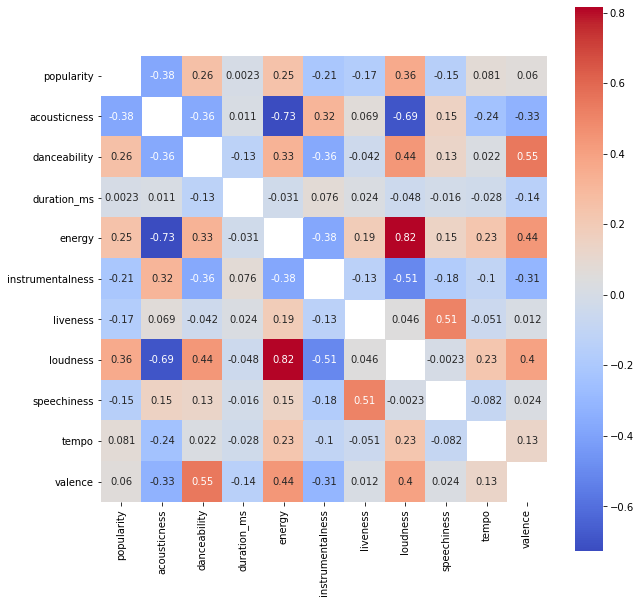

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
cor = music.corr()
eye = np.identity(cor.shape[0])
sns.heatmap(music.corr(), annot=True, square=True, cmap="coolwarm", mask=eye)

In [ ]:
resp = pd.read_csv("young-people-survey/responses.csv")
podcasts=pd.read_csv("young-people-survey/df_popular_podcasts.csv")
word_exp=re.compile("[^\x00-\x7F]+")
non_eng_pod=[index for index,value in enumerate(list(podcasts["Name"].to_dict().values())) if len(re.findall(word_exp,value))!=0]
podcasts=podcasts.drop(non_eng_pod).drop_duplicates("Name", keep="first")

movies=pd.read_csv("young-people-survey/MovieGenre.csv")
movies=movies.drop_duplicates("imdbId")
movies=movies[movies["IMDB Score"].astype(float)>float(5.0)]

music=pd.read_csv("young-people-survey/SpotifyFeatures.csv")
music=music.drop_duplicates("track_id")
music=music[music["popularity"].astype(float)>float(50)]

genre_IDs=[['1311', 'News & Politics'], ['26', 'Podcasts'], ['1479', 'Social Sciences'], ['1315', 'Science & Medicine'], ['1324', 'Society & Culture'], ['1302', 'Personal Journals'], ['1469', 'Language Courses'], ['1304', 'Education'], ['1320', 'Places & Travel'], ['1416', 'Higher Education'], ['1465', 'Professional'], ['1316', 'Sports & Recreation'], ['1303', 'Comedy'], ['1305', 'Kids & Family'], ['1439', 'Christianity'], ['1314', 'Religion & Spirituality'], ['1444', 'Spirituality'], ['1309', 'TV & Film'], ['1462', 'History'], ['1310', 'Music'], ['1478', 'Medicine'], ['1321', 'Business'], ['1412', 'Investing'], ['1420', 'Self-Help'], ['1307', 'Health'], ['1481', 'Alternative Health'], ['1417', 'Fitness & Nutrition'], ['1467', 'Amateur'], ['1480', 'Software How-To'], ['1318', 'Technology'], ['1448', 'Tech News'], ['1456', 'Outdoor'], ['1477', 'Natural Sciences'], ['1301', 'Arts'], ['1454', 'Automotive'], ['1323', 'Games & Hobbies'], ['1438', 'Buddhism'], ['1443', 'Philosophy'], ['1401', 'Literature'], ['1402', 'Design'], ['1410', 'Careers'], ['1470', 'Training'], ['1413', 'Management & Marketing'], ['1306', 'Food'], ['1406', 'Visual Arts'], ['1446', 'Gadgets'], ['1468', 'Educational Technology'], ['1405', 'Performing Arts'], ['1460', 'Hobbies'], ['1471', 'Business News'], ['1404', 'Video Games'], ['1450', 'Podcasting'], ['1473', 'National'], ['1325', 'Government & Organizations'], ['1461', 'Other Games'], ['1466', 'College & High School'], ['1459', 'Fashion & Beauty'], ['1476', 'Non-Profit'], ['1415', 'K-12'], ['1455', 'Aviation'], ['1464', 'Other'], ['1421', 'Sexuality'], ['1472', 'Shopping'], ['1475', 'Local'], ['1441', 'Judaism'], ['1440', 'Islam'], ['1474', 'Regional'], ['1463', 'Hinduism']]

In [ ]:
podcasts.iloc[8110][:]['Name']

In [ ]:
# Better organize the id vs name of genre
dict_pod={int(id[0]):id[1] for id in genre_IDs }

# {Genre ID:NAMES OF PODCAST}
genre_to_podcast={key:[] for key in dict_pod }
for item in podcasts.index:
    array=podcasts["Genre IDs"][item][1:-1].split(',')
    array=[int(array[i].replace('\'', '').strip('\'')) for i in range(len(array))]
    for j in range(len(array)):
        genre_to_podcast[array[j]].append((podcasts["Name"][item], podcasts["Description"][item], podcasts["Podcast URL"][item]))
final_dict={list(dict_pod.values())[p]:list(genre_to_podcast.values())[p] for p in range(len(genre_to_podcast.keys()))}
final_dict = dict((k.lower(), v) for k, v in final_dict.items())

#MAKE MOVIE DICTIONARY
genre_to_movie={}
for i in range( len(movies)):
    line=str(movies.iloc[i]["Genre"])
    for genre in line.split("|"):
        genre=genre.lower()
        if genre in genre_to_movie:
            genre_to_movie[genre].append(movies.iloc[i]["Title"])
        else:
            genre_to_movie[genre]=[movies.iloc[i]["Title"]]

#MAKE MUSIC DICTIONARY
genre_to_music={}
for i in range(len(music)):
    genre=music.iloc[i]['genre']
    genre=genre.lower()
    if genre in genre_to_music:
            genre_to_music[genre].append((music.iloc[i]['track_id'], music.iloc[i]['track_name'],  music.iloc[i]['genre'],  music.iloc[i]['artist_name']))
    else:
            genre_to_music[genre]=[(music.iloc[i]['track_id'], music.iloc[i]['track_name'],  music.iloc[i]['genre'],  music.iloc[i]['artist_name'])]


In [ ]:
song=recs(genre_to_music, ["Folk"])

In [ ]:
song=[{
            'title': item[0][1],
            'url': "https://open.spotify.com/embed/track/"+item[0][0],
            'artist': item[0][3], 
            'genre': item[0][2]
            } for item in song]

In [ ]:
podcast=recs(final_dict,["News & Politics"])

In [ ]:
podcast=[{
            'title': item[0][0],
            'description': item[0][1],
            'url': item[0][2]
            } for item in podcast]

In [ ]:
def cosine_sim(corpus):
    vectorizer=TfidfVectorizer(stop_words="english", min_df=1)
    tfidf = vectorizer.fit_transform(corpus)
    similarity = tfidf * tfidf.T
    return similarity.toarray()

In [ ]:
cosine_sim("I'd like an apple",  "An apple a day keeps the doctor away")

In [ ]:
def get_max_val(np_array): 
    index_max_val=np.argmax(np_array)
    output=(podcasts.iloc[index_max_val][:]["Name"], podcasts.iloc[index_max_val][:]["Description"], podcasts.iloc[index_max_val][:]["Podcast URL"], np_array[index_max_val])
    np_array[index_max_val]=0
    return output

def podcast_recs(query):
    descriptions=list(podcasts['Description'])
    corpus=[query]+descriptions
    matrix=cosine_sim(corpus)
    matrix_slice=matrix[:][0][1:]
    result=[]
    for x in range(5):
        result.append(get_max_val(matrix_slice))
    return result

In [ ]:
podcast=podcast_recs("Soft and soothing")

In [ ]:
podcast=[{
            'title': item[0],
            'description': item[1],
            'url': item[2], 
            'score': item[3]
            } for item in podcast]

In [ ]:
podcast

In [ ]:
def recs(genre_dict, genre_query):
    """Returns a list of recommendations based on interests user clicked in form
    Params: {query: list of genre names, genre_dict: dictionary that maps genre to titles, corr_dict: maps personality questions to answers given in survey}
    Returns: list of tuples containing titles and scores
    """

    genre_query=[genre.lower() for genre in genre_query]

    counter={}
    for cat in genre_query:
        for film in genre_dict[cat]:
            if film in counter:
                counter[film]+=1
            else:
                counter[film]=1
    results = list(counter.items())
    random.shuffle(results)  
    results.sort(key=lambda x: x[1], reverse=True)

    return results